<H1 style="text-align:center;">
Chapter 7: Finding Patterns
</H1>
<hr style="height:5px;">

## Hierarchical clustering
<hr style="height:2px;">

In this example, we apply hierarchical clustering to the Iris data. The data is first normalized with the `StandardScaler` object. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Loading the iris data
iris = datasets.load_iris()
X = iris.data  # array for the features
y = iris.target  # array for the target
feature_names = iris.feature_names   # feature names
target_names = iris.target_names   # target names

# z-score normalization using fit_transform method
X_norm = StandardScaler().fit_transform(X)

Then the hierarchical clustering is implemented as an `AgglomerativeClustering` object available in the `sklearn.cluster` library. We set the number of clusters to 3 by setting the `n_clusters` parameter. We use the Ward method for linkage calculation by setting the `linkage` parameter. 

In [2]:
# Hierarchical clustering
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')

Then we learn from the model by using the `fit` method associated with the clustering object `hc`. The resulting cluster assignments are stored in the array `y_clus`.

In [3]:
hc.fit(X_norm)  # actually fitting the data
y_clus = hc.labels_   # clustering info resulting from hieararchical

We visualize the resulting clusters with a scatter plot, plotting the sepal length on the x-axis and the petal width on the y-axis. Different clusters are indicated by different colors.

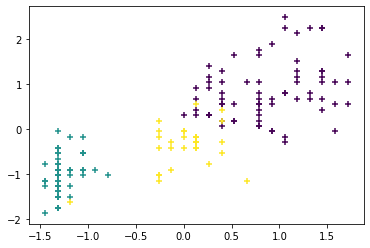

In [4]:
# Plotting the clusters
plt.scatter(X_norm[:,3],X_norm[:,0],c=y_clus,marker='+')
plt.show()

Next, we generate a dendrogram describing distances between different clusters. To do so, we use the `linkage` function to calculate distances between observations, and the `dendrogram` function to plot the actual dendrogram. Both functions are available in the `scipy.cluster.hierarchy` library. In the linkage function, we provide the normalized features `X_norm` and the linkage method `ward` (for the Ward method). The resulting distance matrix `D` is then used in the `dendrogram` function.

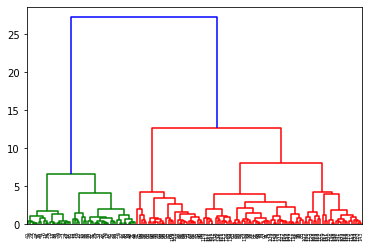

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage

D = linkage(X_norm, 'ward')
dn = dendrogram(D)
plt.show()